# Setup the workspace

In [77]:
# Created on: 08 Feb 2022
# Created by: Philip P
# Script to get current HYROX results and simulate some finish times to see 
# how much time I could make up
import os
import re

import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(100)

## Declare the previous results - see [here](https://hyrox.r.mikatiming.com/season-4/?content=detail&fpid=list&pid=list&idp=2EFMS4JI288F0&lang=EN_CAP&event=H_2EFMS4JI2BD&page=2&pidp=start&ranking=time_finish_netto&search%5Bsex%5D=M&search%5Bage_class%5D=%25&search%5Bnation%5D=%25&search_event=H_2EFMS4JI2BD )

In [52]:
# declare the time scores - sourced from 
run_legs = {
    1: 3.55, 2: 4.10, 3: 4.32, 4: 4.18,
    5: 4.20, 6: 4.21, 7: 4.08, 8: 4.34  
}
functional_stations = {
    'ski_erg': 4.35,
    'sled_push': 2.13,
    'sled_pull': 3.48,
    'burpee': 3.59,
    'row': 4.27,
    'carry': 2.06,
    'lunges': 4.21,
    'wall_balls': 5.23
}
rock_zone = 4.59

## Tidy up the results and convert to seconds

In [69]:
functional_station_secs = {
    k: 60*int(functional_stations[k]) + 100*(functional_stations[k] % 1) 
    for k, v in functional_stations.items()}

run_legs_s = [60*int(k) + 100*(k % 1) for k in run_legs.values()] # 60 * int(k)

### Visualise the results to see if they make sense

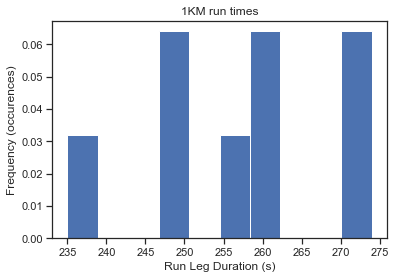

In [71]:
plt.hist(run_legs_s,
        density=True)
plt.xlabel("Run Leg Duration (s)")
plt.ylabel("Frequency (occurences)")
plt.title("1KM run times")
plt.show()

These look quite sensible, seems like the average time was around 255s (4m15s), with the minimum being just under 4 mins (3.55), and maximum just over 4 and a half mins (4.34).

### Random Sampling for the run

Generate some random samples from the same distribution to get random times for the simulation

In [75]:
num_samples = 1000
results_describe = pd.Series(run_legs_s).describe()

run_1k_times = np.random.normal(loc=results_describe['mean'],
                                scale=results_describe['std'],
                                size=num_samples)

Inspect the normally distributed times to check they are realistic.

In [87]:
def plot_run_results(times_vector: np.ndarray) -> None:
    """Helper method to plot the sample times from the normal distribution."""
    sns.set_theme(style="ticks")

    f, ax = plt.subplots(figsize=(7, 6))

    sns.boxplot(
        x=times_vector,
        whis=[0, 100], width=.6, palette="vlag")

    # Add in points to show each observation
    sns.stripplot(x=times_vector,
                  size=4, color=".3", linewidth=0)
    ax.xaxis.grid(True)
    plt.xlabel('1KM Run Time (s)')
    plt.title("Box plot of run times from sample")

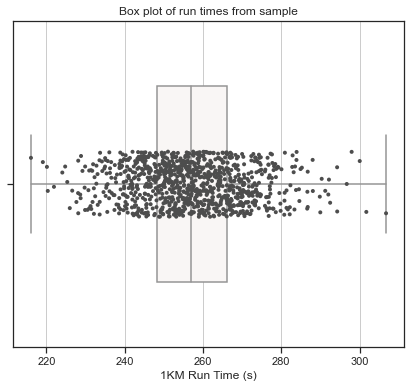

In [88]:
plot_run_results(times_vector=run_1k_times)

These times look quite realistic, with a cluster around 260s (4m20s), and the minimum time being less than 220s (3m40s), and maximum around 310s (5m10s). I'm not sure how realistic these are in terms of range, I think the times perhaps could be more tight in the next event.

Decrease the standard deviation for the next iteration.

In [89]:
new_sample = np.random.normal(loc=results_describe['mean'],
                              scale=0.75*results_describe['std'],
                              size=num_samples)

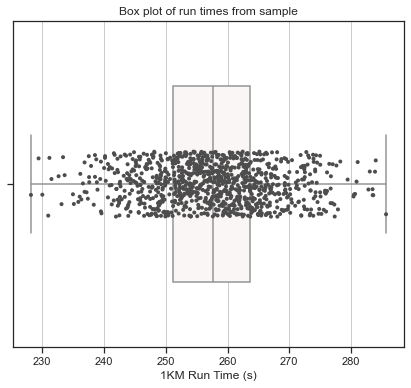

In [90]:
plot_run_results(times_vector=new_sample)

This probably looks a little more realistic, with the quickest lap being around 230s (3m50s), which is definitely realistic for an event (especially if one lap is shorter than the rest). The slowest lap being around 285s (4m45s) is also realistic, with the adrenaline definitely not allowing me to go slower than this.